In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_log_error
from statsmodels.tsa.stattools import adfuller

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import torch
import torch.nn as nn

import tensorflow as tf

from itertools import product

import sympy as sp

import warnings
import itertools
import math

In [3]:
data_raw = pd.read_csv('MMM_full.csv')
length = len(data_raw)
T = 200
lookback = 10
print(length)
final_length = length-T
print(final_length)

p = math.floor((1-((T+lookback)/final_length))*100)/100
p

1257
1057


0.8

In [4]:
train_len = int(final_length*p)
train_len

845

In [5]:
# Split data for training and testing
def split_data(stock, lookback, train_len, test_len):
    data = []
    for index in range(len(stock) - test_len - lookback):
        data.append(stock[index : index + lookback])

    data = np.array(data)
    print("DATA: "+str(data.shape))
    # Align train/test split with specified train_len and test_len
    x_train = data[:len(data) - test_len, :-1, :]
    y_train = data[:len(data) - test_len, -1, :]

    x_test = data[-test_len:, :-1]
    y_test = data[-test_len:, -1, :]

    return x_train, y_train, x_test, y_test

def calculate_mml(fisher_info_matrix, log_likelihood, k):
    # Constants
    EULER_CONSTANT = 0.577215664901532860606512090082402431042
    PI = np.pi
    LOG_2PI = np.log(2 * PI + 1e-10)
    fisher_det = np.linalg.det(fisher_info_matrix)

    lattice_constant = -0.5 * k * LOG_2PI + 0.5 * np.log(k * PI) - EULER_CONSTANT
    # log_lattice_constant = -1*LOG_2PI + (1/k)*np.log(k * PI) - ((2*EULER_CONSTANT)/k) - 1

    comp1 = 0 # log(1) = 0
    comp2 = 0.5*np.log(fisher_det)
    comp3 = lattice_constant
    comp4 = -1*log_likelihood
    mml = comp1 + comp2 + comp3 + comp4
    return mml

Processing stock: MMM
Best ARIMA order for MMM: (3, 1, 2)


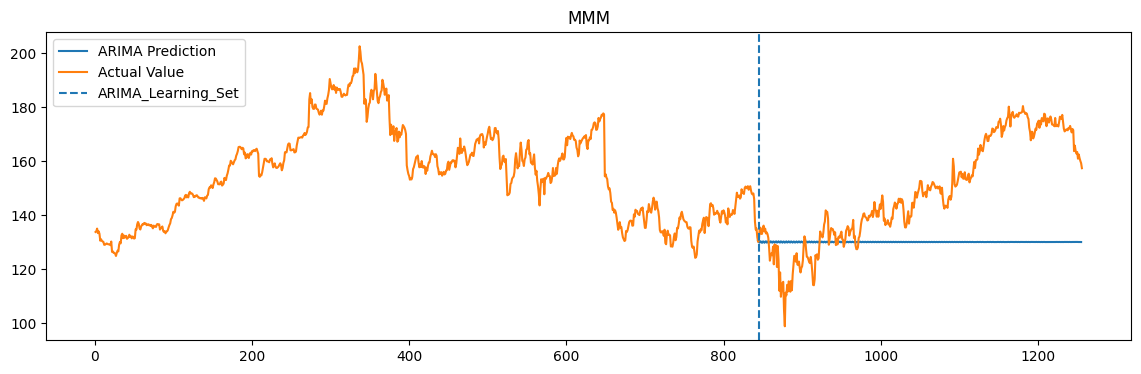

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0252
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0209
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0171
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0134
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0071
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0045
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0023
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.5047e-04
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3477e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
final_prediction: 200


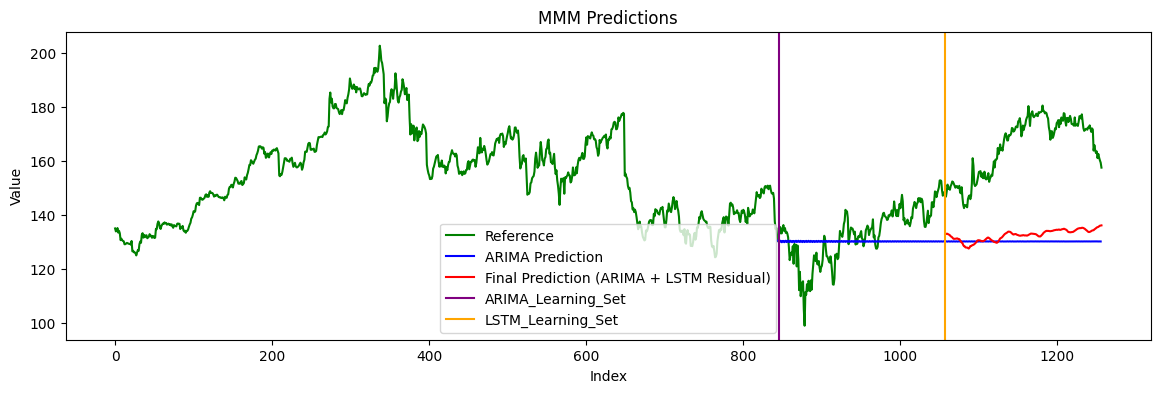

ARIMA + LSTM RMSE for MMM: 34.249850309634695
Processing stock: KO
Best ARIMA order for KO: (0, 1, 2)


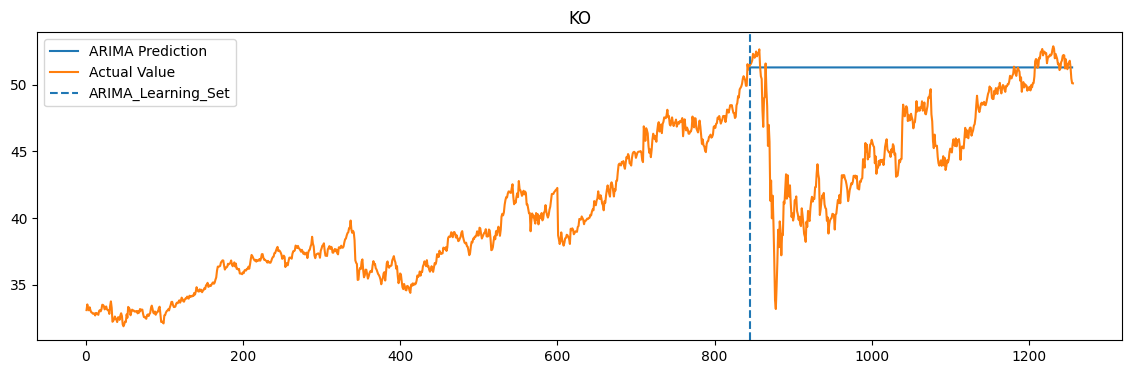

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8994
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8470
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7967
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7478
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6996
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6512
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6020
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5515
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4992
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4449
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
final_prediction: 200


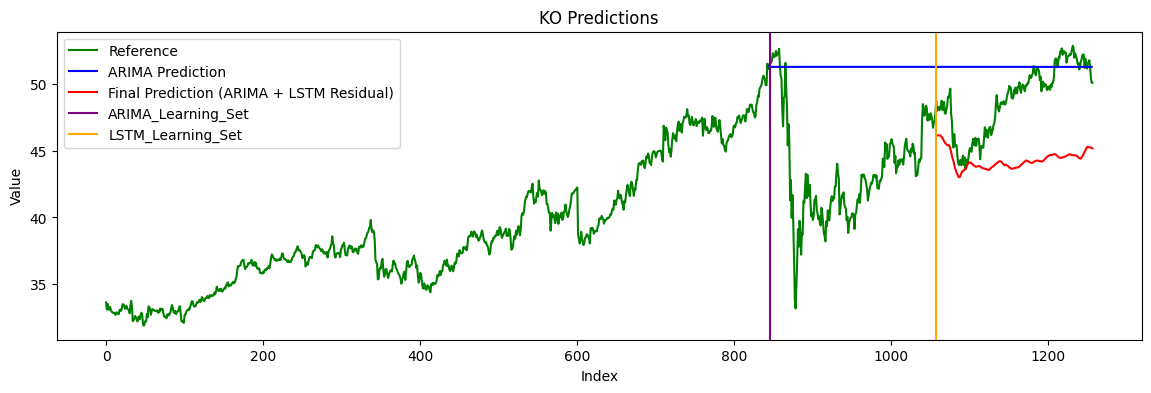

ARIMA + LSTM RMSE for KO: 5.124402951321141
Processing stock: JPM
Best ARIMA order for JPM: (0, 1, 0)


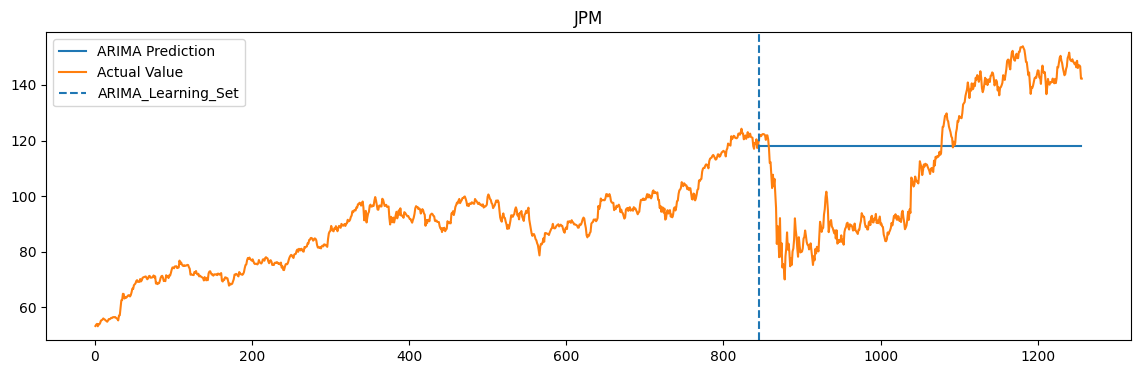

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0496
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0427
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0363
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0302
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0244
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0138
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0053
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0023


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
final_prediction: 200


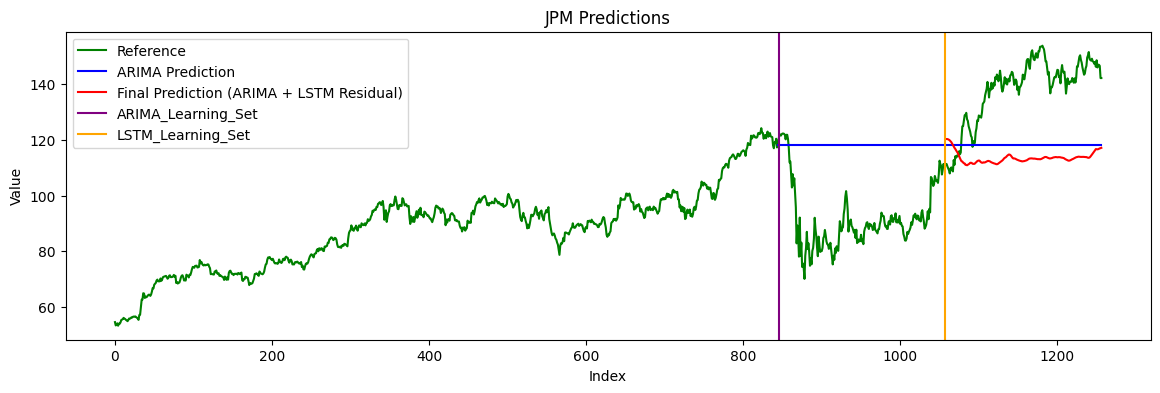

ARIMA + LSTM RMSE for JPM: 27.440157552420366
Processing stock: INTC
Best ARIMA order for INTC: (2, 1, 2)


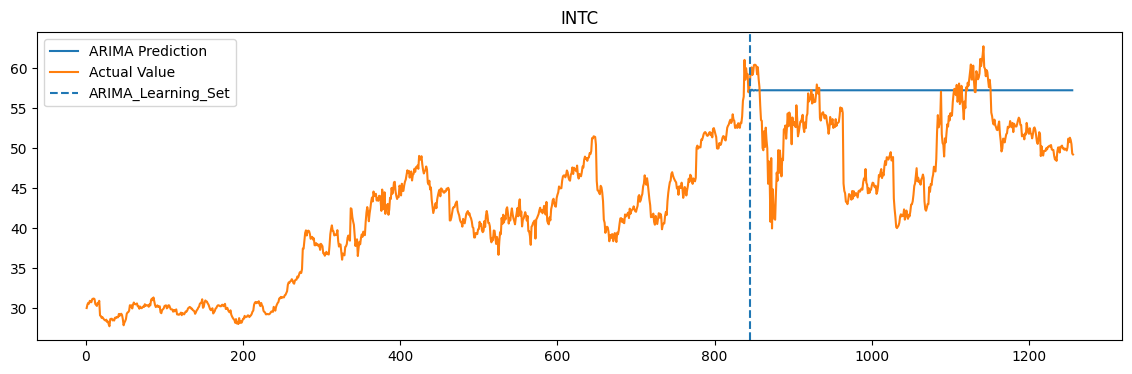

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5130
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4703
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4287
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3878
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3469
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3061
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2652
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2243
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1838
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1442


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
final_prediction: 200


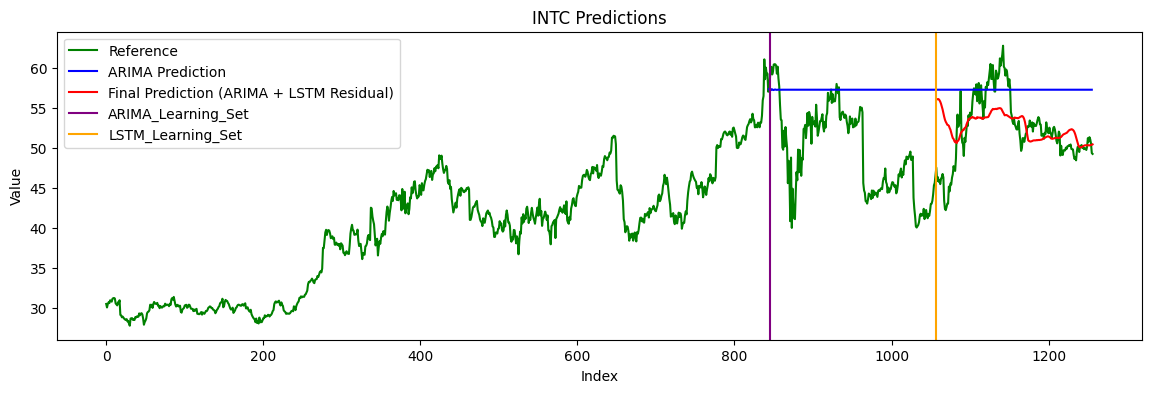

ARIMA + LSTM RMSE for INTC: 3.9450362183346037
Processing stock: IBM
Best ARIMA order for IBM: (0, 1, 0)


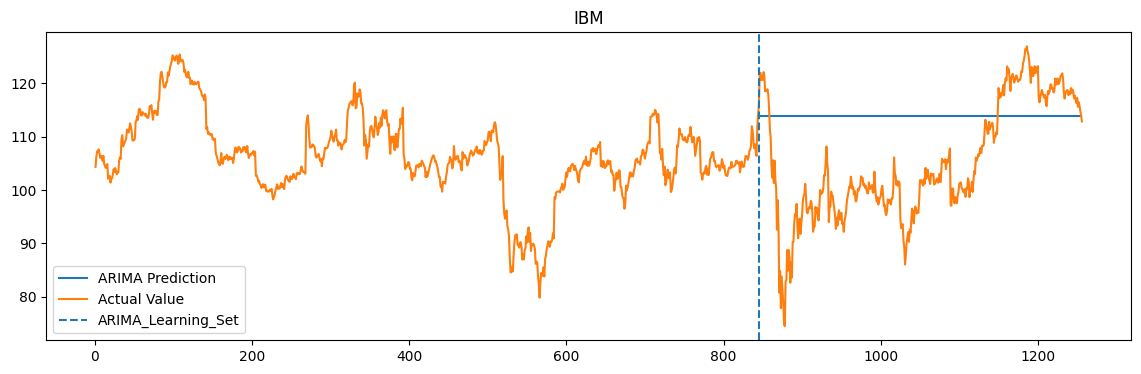

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4568
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4254
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3955
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3663
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3375
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3083
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2786
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2480
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2166
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1845
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
final_prediction: 200


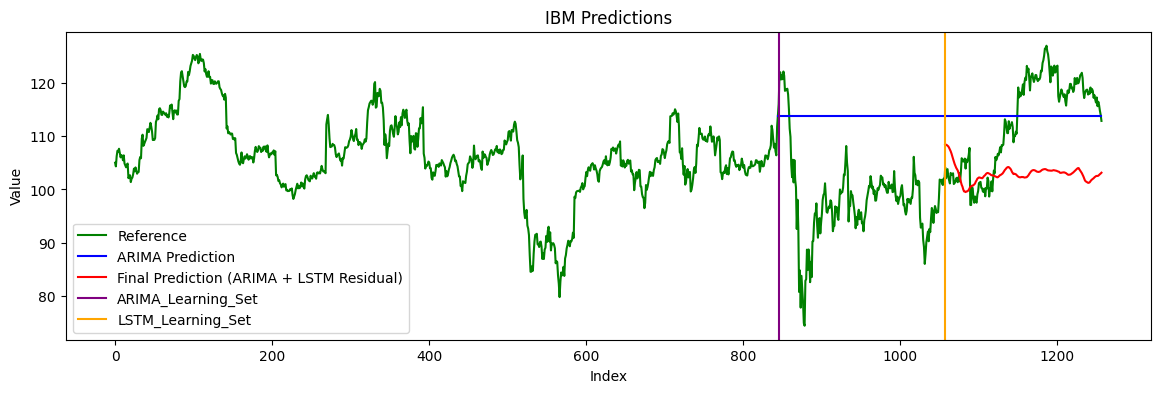

ARIMA + LSTM RMSE for IBM: 12.915175419541715
Processing stock: GS
Best ARIMA order for GS: (0, 1, 0)


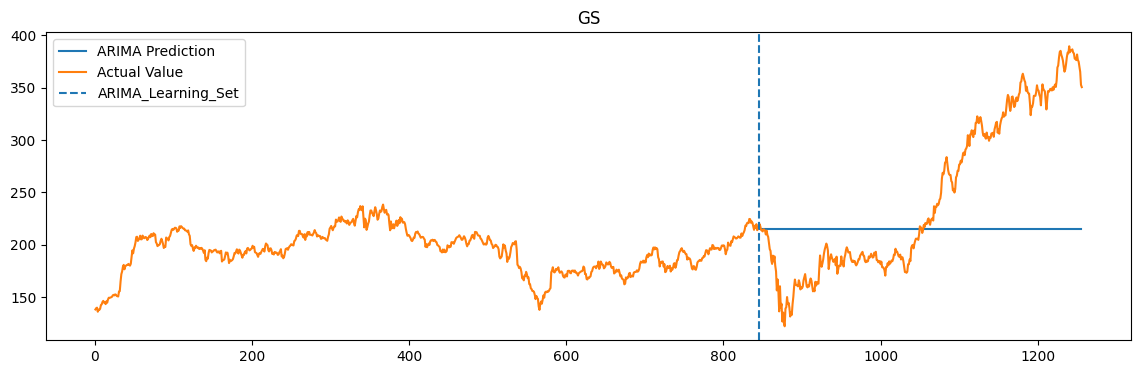

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1122
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1005
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0893
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0784
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0679
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0577
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0477
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0290
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0204
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
final_prediction: 200


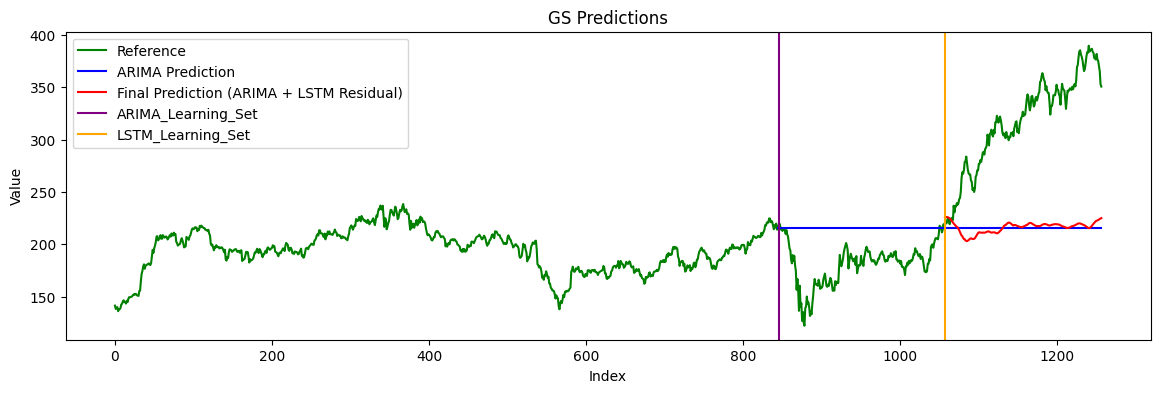

ARIMA + LSTM RMSE for GS: 110.06936809497918
Processing stock: CSCO
Best ARIMA order for CSCO: (0, 1, 0)


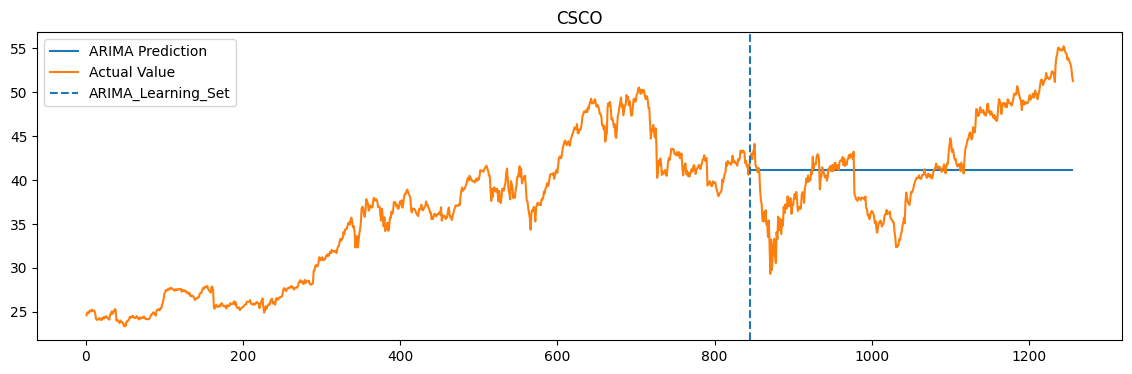

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0096
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0076
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0058
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0042
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0028
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0016
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.2083e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.0438e-04
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1485e-04
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.1776e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
final_prediction: 200


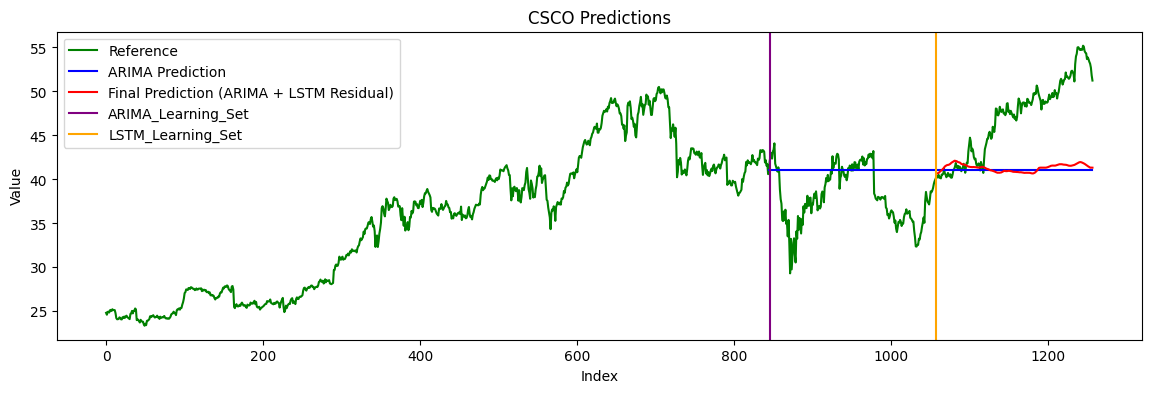

ARIMA + LSTM RMSE for CSCO: 7.226151471362642
Processing stock: BA
Best ARIMA order for BA: (0, 1, 0)


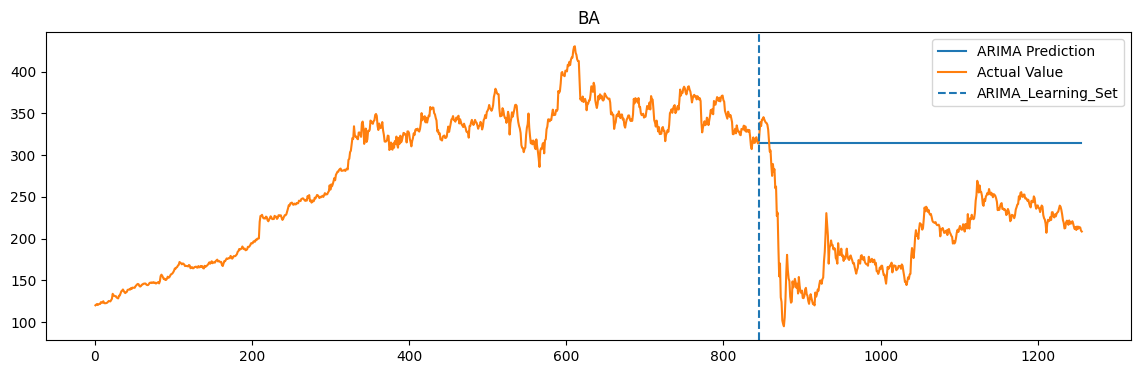

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8418
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7946
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7476
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6998
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6506
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5995
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5461
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4901
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4315
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3703
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
final_prediction: 200


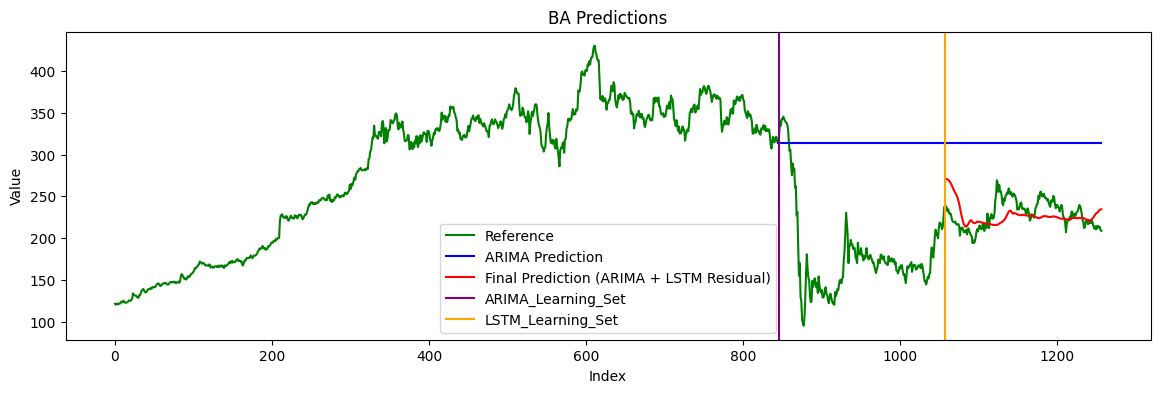

ARIMA + LSTM RMSE for BA: 19.60965901347637
Processing stock: AAPL
Best ARIMA order for AAPL: (4, 1, 1)


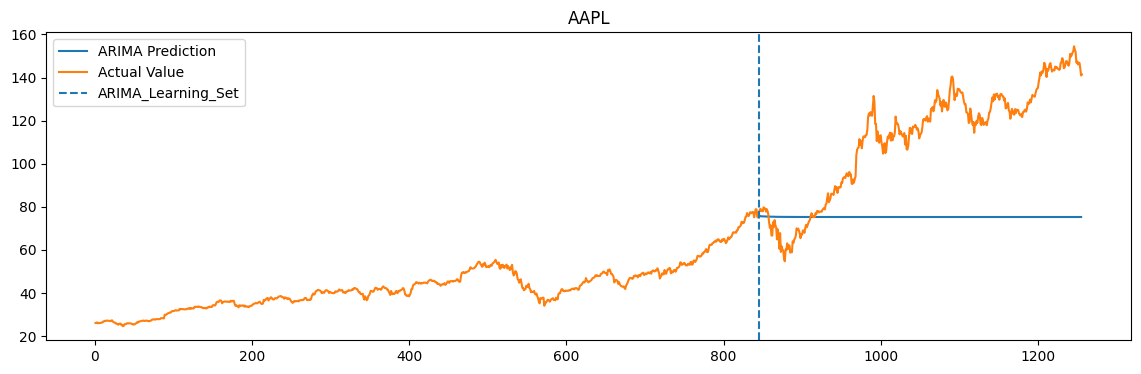

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2366
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2143
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1915
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1681
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1440
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1197
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0952
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0712
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0485
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0283
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
final_prediction: 200


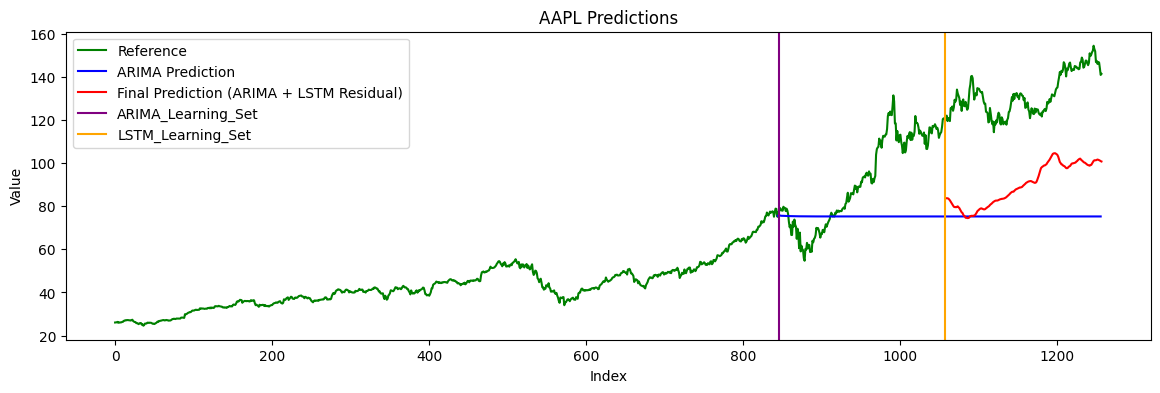

ARIMA + LSTM RMSE for AAPL: 42.96734902518405
Processing stock: JNJ
Best ARIMA order for JNJ: (0, 1, 0)


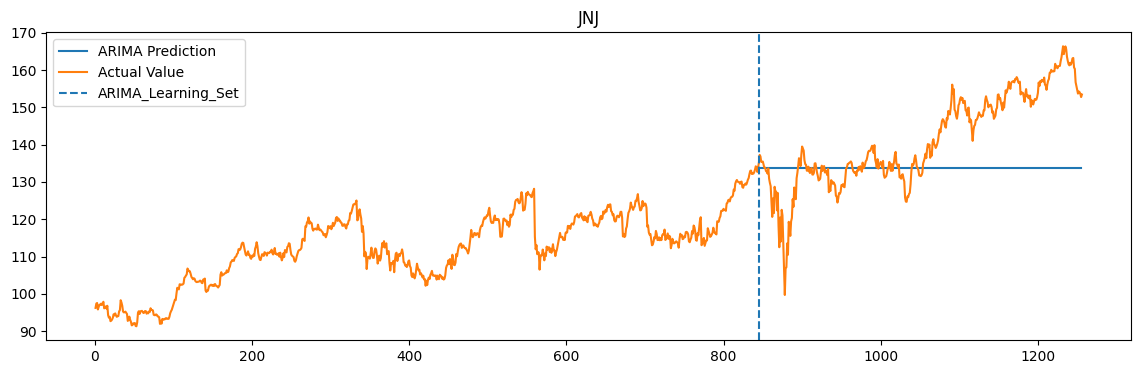

DATA: (202, 10, 1)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0950e-05
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.9230e-05
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.6759e-05
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.5960e-06
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.0695e-05
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.9441e-05
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.9457e-06
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.8315e-06
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3196e-05
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.5271e-05
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
final_prediction: 200


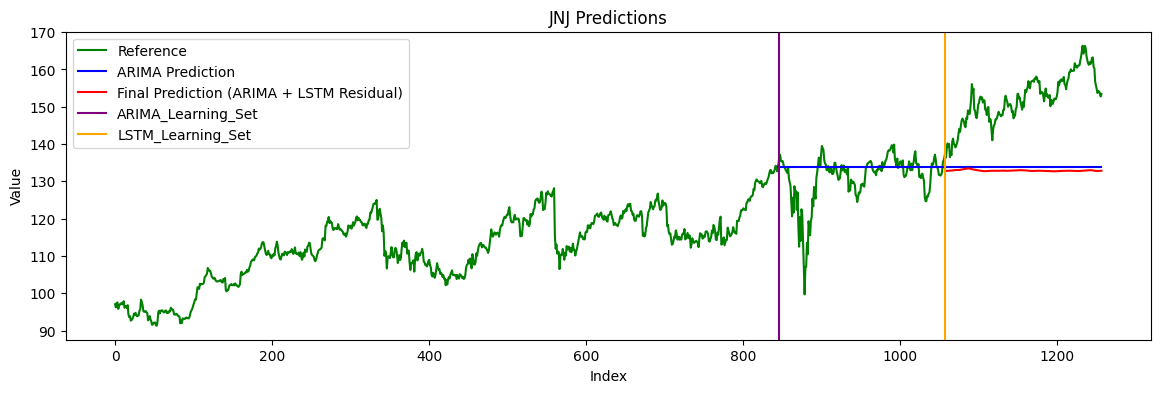

ARIMA + LSTM RMSE for JNJ: 20.343697853530596
Average RMSE for ARIMA + LSTM: 28.389084790978536


In [6]:
columns = data_raw.columns
stock_columns = [col for col in columns if col != 'Date']  # Assuming 'Date' column exists

# Initialize a list to store RMSE values for all stocks
rmse_combined_values = []  # For ARIMA + LSTM predictions

# Iterate over each stock
for stock in stock_columns:
    print(f"Processing stock: {stock}")
    ARIMA_Train = data_raw.loc[:, [stock]][:train_len]
    ARIMA_Test = data_raw.loc[:, [stock]][train_len:]

    # Fit ARIMA Model
    warnings.filterwarnings("ignore")
    q_arima = range(0, 3)
    d_arima = 1
    p_arima = range(0, 8)
    AIC_arima = []
    BIC_arima = []
    HQ_arima = []
    MML_arima = []
    ARIMAX_model = []
    pdqs = [(x[0], d_arima, x[1]) for x in list(itertools.product(p_arima, q_arima))]

    for pdq in pdqs:
        try:
            mod = ARIMA(ARIMA_Train, order=pdq)
            results = mod.fit()
            log_likelihood = results.llf
            # AIC_arima.append(results.aic)
            # BIC_arima.append(results.bic)
            HQ_arima.append(results.hqic)

            # k = len(results.params)
            # hessian = mod.hessian(results.params)
            # fisher_info_matrix = -np.linalg.inv(hessian)
            # print(fisher_info_matrix)
            # fisher_info_matrix = np.linalg.inv(cov_matrix)
            # message_length = calculate_mml(fisher_info_matrix, log_likelihood, k)
            # MML_arima.append(message_length)

            ARIMAX_model.append([(1, 1, 0), pdq])
        except:
            continue

    # Choose best model
    order = ARIMAX_model[HQ_arima.index(min(HQ_arima))][1]
    print(f"Best ARIMA order for {stock}: {order}")
    model = ARIMA(ARIMA_Train, order=order)
    fit = model.fit()
    preds = fit.predict(start=train_len, end=len(data_raw)-1, typ='levels')
    preds_pd = preds.to_frame()
    preds_pd.index -= 1

    # print("preds_pd: "+str(len(preds_pd)))
    # print("preds_pd: "+str(preds_pd.shape))

    reference_test_values = data_raw[stock].values[-T:]  # Last T values

    # draw predict figure
    plt.figure(figsize=(14, 4))
    plt.plot(preds_pd,label="ARIMA Prediction")
    plt.plot(data_raw.iloc[1:][stock],label="Actual Value")
    plt.axvline(x=train_len,  linestyle='--',label="ARIMA_Learning_Set")
    plt.legend()
    plt.title(stock, size=12)
    plt.show()

    # Residuals
    ARIMA_Result = pd.DataFrame(columns=['raw', 'predicted', 'residuals'])
    ARIMA_Result['raw'] = data_raw[stock][train_len:]
    ARIMA_Result['predicted'] = preds_pd
    ARIMA_Result['residuals'] = ARIMA_Result['raw'] - ARIMA_Result['predicted']

    # print("ARIMA_Result['raw']")
    # print(ARIMA_Result['raw'])

    # print("ARIMA_Result['predicted']")
    # print(ARIMA_Result['predicted'])

    # print("ARIMA_Result['residuals']")
    # print(ARIMA_Result['residuals'])

    ARIMA_close_prices = ARIMA_Result['residuals'].values.astype(float)

    # print("ARIMA_close_prices shape:", ARIMA_close_prices.shape)
    # print("Are there NaNs in ARIMA_close_prices?", np.isnan(ARIMA_close_prices).any())
    # print("ARIMA_close_prices range:", ARIMA_close_prices.min(), ARIMA_close_prices.max())

    # print(len(ARIMA_close_prices))

    # Scaling
    Price_scaler = MinMaxScaler(feature_range=(-1, 1))
    ARIMA_close_prices = Price_scaler.fit_transform(ARIMA_close_prices.reshape(-1, 1))

    # print("ARIMA_close_prices")
    # print(ARIMA_close_prices)

    # Split data for LSTM
    x_train, y_train, x_test, y_test = split_data(ARIMA_close_prices, lookback, train_len, T)

    # print("x_train: "+str(len(x_train)))
    # print("y_train: "+str(len(y_train)))
    # print("x_test: "+str(len(x_test)))
    # print("y_test: "+str(len(y_test)))

    # Convert to tensors
    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)
    y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
    y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

    # print("x_train")
    # print(x_train)

    # print("x_test")
    # print(x_test)

    # print("y_train_lstm")
    # print(y_train_lstm)

    # print("y_test_lstm")
    # print(y_test_lstm)

    # Define LSTM model in Keras
    lstm_model = Sequential([
        LSTM(30, return_sequences=True, input_shape=(order[2], x_train.shape[2])),
        LSTM(30, return_sequences=True),
        LSTM(30),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    # Train the LSTM model
    lstm_model.fit(x_train, y_train_lstm, epochs=10, batch_size=32, verbose=1)

    # LSTM predictions for the residuals
    y_test_pred = lstm_model.predict(x_test)
    y_test_pred = Price_scaler.inverse_transform(y_test_pred)
    lstm_residual_preds = y_test_pred.reshape(-1)

    # print("y_test_pred: "+str(len(y_test_pred)))

    # print("LSTM y_test_pred Predictions:")
    # print(y_test_pred)

    # Calculate ARIMA predictions for the test set
    arima_test_preds = preds_pd[-T:]
    # print("arima_test_preds: "+str(len(arima_test_preds)))
    arima_test_preds = arima_test_preds.values.flatten()  # Flatten to 1D array
    # print("arima_test_preds: "+str(len(arima_test_preds)))
    # print("arima_test_preds: "+str(arima_test_preds.shape))

    # print("ARIMA Test Predictions:")
    # print(arima_test_preds)

    # Ensure LSTM predictions match ARIMA in dimensions
    lstm_residual_preds = y_test_pred.reshape(-1)  # LSTM predicted residuals for the test period

    # print("LSTM Residual Predictions:")
    # print(lstm_residual_preds)

    # Sum ARIMA predictions and LSTM residuals for the final prediction
    final_prediction = arima_test_preds + lstm_residual_preds
    print("final_prediction: "+str(len(final_prediction)))
    # print(final_prediction)

    # Ensure proper indices for final prediction
    final_prediction_start = len(data_raw) - T
    final_prediction_indices = range(final_prediction_start, len(data_raw))

    # Plot the final prediction
    plt.figure(figsize=(14, 4))
    plt.plot(data_raw[stock], label="Reference", color="green")
    plt.plot(preds_pd, label="ARIMA Prediction", color="blue")
    plt.plot(
        final_prediction_indices,
        final_prediction,
        color="red",
        label="Final Prediction (ARIMA + LSTM Residual)",
    )
    plt.axvline(x=train_len, color="purple", label="ARIMA_Learning_Set")
    plt.axvline(x=final_prediction_start, color="orange", label="LSTM_Learning_Set")
    plt.title(f"{stock} Predictions", size=12)
    plt.xlabel("Index", size=10)
    plt.ylabel("Value", size=10)
    plt.legend()
    plt.show()

    # Calculate RMSE for ARIMA + LSTM combined predictions
    rmse_combined = np.sqrt(mean_squared_error(reference_test_values, final_prediction))
    rmse_combined_values.append(rmse_combined)
    print(f"ARIMA + LSTM RMSE for {stock}: {rmse_combined}")

# Calculate and print average RMSE for both models
average_rmse_combined = np.mean(rmse_combined_values)
print(f"Average RMSE for ARIMA + LSTM: {average_rmse_combined}")